# (1)

For this problem, we will be calculating the gradient for a relatively simple function (sine function) according to a couple of prompts:

1) 1st derivative w/ 5-pt symmetric stencil
2) 2nd derivative w/ 7-pt symmetric stencil

We will be using the objects that I created that allow us to do all these options.


## (a)


In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
module_path = os.path.abspath(os.path.join('..', r"C:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\code\lib" ))
sys.path.append(module_path)

from distributedObjects import *
from distributedFunctions import *

factorial_numba(1)



1

In [2]:
gradient_a = numericalGradient( 1 , ( 2 , 2 ) )
gradient_a.coeffs


array([ 0.08333333, -0.66666667,  0.        ,  0.66666667, -0.08333333])

In [3]:
gradient_a.coeffs_LHS


array([-2.08333333,  4.        , -3.        ,  1.33333333, -0.25      ])

In [4]:
gradient_a.coeffs_RHS


array([ 0.25      , -1.33333333,  3.        , -4.        ,  2.08333333])

In [5]:
gradient_b = numericalGradient( 2 , ( 3 , 3 ) )
gradient_b.coeffs


array([ 0.01111111, -0.15      ,  1.5       , -2.72222222,  1.5       ,
       -0.15      ,  0.01111111])

In [6]:
gradient_b.coeffs_LHS


array([  4.51111111, -17.4       ,  29.25      , -28.22222222,
        16.5       ,  -5.4       ,   0.76111111])

In [7]:
gradient_b.coeffs_RHS

array([  0.76111111,  -5.4       ,  16.5       , -28.22222222,
        29.25      , -17.4       ,   4.51111111])

## (b)

Now we will calculate the matrix that forms the matrix gradient calculation for our sine function. The best way to contrast the methods of matrix multiplication and looping will be to time for a very large value of points, say N=1e3.


In [8]:
N = 100

t0 = time.time()
gradient_calc_a = gradient_a.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
t1 = time.time()
gradient_calc_a = gradient_a.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) , method = 'loop')
t2 = time.time()

print("Matrix took\t{x:.6f} [seconds]".format(x=(t1-t0)))
print("Looping took\t{x:.6f} [seconds]".format(x=(t2-t1)))



Matrix took	0.032006 [seconds]
Looping took	0.053013 [seconds]


So, clearly the matrix method is far more computationally efficient. Keep in mind that we did re-define the gradient matrix for each of these methods, although I am not sure that made a particular difference. Let's try gradient (b) to see if there are any different results.



In [9]:
N = 100

t0 = time.time()
gradient_calc_b = gradient_b.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
t1 = time.time()
gradient_calc_b = gradient_b.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) , method = 'loop')
t2 = time.time()

print("Matrix took\t{x:.6f} [seconds]".format(x=(t1-t0)))
print("Looping took\t{x:.6f} [seconds]".format(x=(t2-t1)))


Matrix took	0.004001 [seconds]
Looping took	0.048010 [seconds]


Extremely similar results. Plus, the sparse matrix method SciPy provides is far more efficient on the memory since there are not a bunch of zeros hogging precious memory space.


In [10]:
print( "The sparse matrix is " + str( 1 - gradient_a.gradientMatrix.nnz / ( N ** 2 ) ) + " % efficient memory-wise." )


The sparse matrix is 0.912 % efficient memory-wise.


## (c)

Our next task is to look at calculating the derivative according to our discrete scheme against the exact solution.

Since this is simply a sine function, we do know the first and second derivatives (cos(x) and -sin(x), respectively). Note, we could also, if we had any doubts, use the SymPy toolbox to symbolically solve to the same end. However, as my structures professor Dr Cope would say, we will use our superior engineering knowledge to take a shortcut.


Text(0.5, 1.0, 'Comparison of Numerical vs Exact Solution\nfor 5-pt stencil of 1st Derivative')

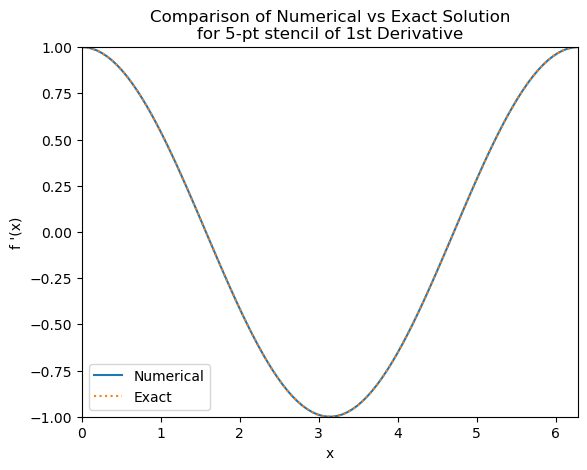

In [11]:
gradient_calc_a = gradient_a.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
#gradient_calc_a = gradient_a.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) , method = 'loop' )
gradient_a_exact = np.cos( np.linspace( 0 , 2 * np.pi , num = N ) )

plt.plot( np.linspace( 0 , 2 * np.pi , num = N ) , gradient_calc_a , label = "Numerical" )
plt.plot( np.linspace( 0 , 2 * np.pi , num = N ) , gradient_a_exact , ':' , label = "Exact" )

plt.xlim((0,2*np.pi))
plt.ylim((-1,1))

plt.legend( loc = 'best' )

plt.xlabel('x')
plt.ylabel('f \'(x)')
plt.title("Comparison of Numerical vs Exact Solution\nfor 5-pt stencil of 1st Derivative")


Clearly there is not an appreciable difference in values based on the selected resolution. Let's plot the difference between the values instead.


Text(0.5, 1.0, 'Difference in Exact and Numerical Values')

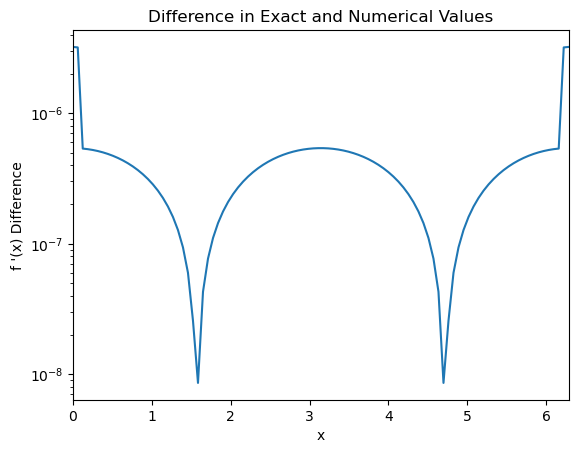

In [12]:
plt.semilogy( np.linspace( 0 , 2 * np.pi , num = N ) , np.abs( gradient_a_exact - gradient_calc_a ) , label = "Difference" )

plt.xlim((0,2*np.pi))
#plt.ylim((1))

plt.xlabel('x')
plt.ylabel('f \'(x) Difference')
plt.title("Difference in Exact and Numerical Values")


This is actually really interesting. First, there's clearly not a whole lot of error. Secondly, it's apparent that the main errors are going to come from the edges. This looks very similar to the effect known as "edge effect" in convolution. Not sure what it means, but it's interesting.


## (d)

So, let's do the same for the second derivative from case (b).


Text(0.5, 1.0, 'Comparison of Numerical vs Exact Solution\nfor 7-pt stencil of 2nd Derivative')

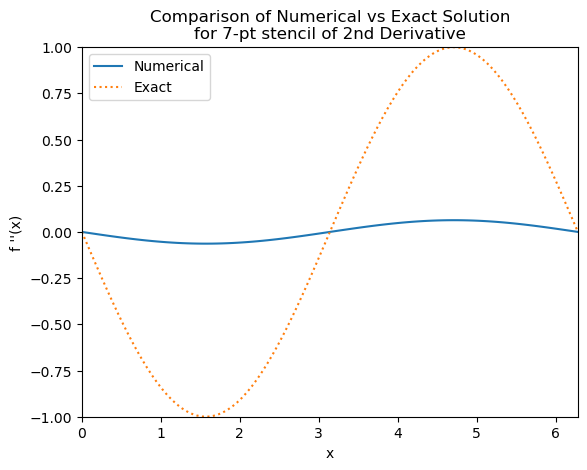

In [13]:
gradient_calc_b = gradient_b.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
#gradient_calc_b = gradient_b.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) , method = 'loop' )
gradient_b_exact = - np.sin( np.linspace( 0 , 2 * np.pi , num = N ) )

plt.plot( np.linspace( 0 , 2 * np.pi , num = N ) , gradient_calc_b , label = "Numerical" )
plt.plot( np.linspace( 0 , 2 * np.pi , num = N ) , gradient_b_exact , ':' , label = "Exact" )

plt.xlim((0,2*np.pi))
plt.ylim((-1,1))

plt.legend( loc = 'best' )

plt.xlabel('x')
plt.ylabel('f \'\'(x)')
plt.title("Comparison of Numerical vs Exact Solution\nfor 7-pt stencil of 2nd Derivative")


This is really odd. We verified that the coefficients are correct in the previous part of the problem.

I've spent some time diagnosing what in the world is going on, there is nothing that I can identify that would cause such an error.

## (e)

So let's do a convergence analysis.


In [14]:
N_s = [ 10 , 20 , 40 , 80 , 160 ]


In [15]:
net_TE_a = np.zeros( len( N_s ) )
for i , N in enumerate( N_s ):
    u_calc = gradient_a.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
    u_exac = np.cos( np.linspace( 0 , 2 * np.pi , num = N ) )
    TE = u_exac - u_calc
    net_TE_a[i] = np.sum( TE )

net_TE_a


array([-8.99780956e-03,  5.85728829e-03,  4.36154879e-04,  2.74905215e-05,
        1.69914733e-06])

In [16]:
1 /( np.asarray( N_s ) )


array([0.1    , 0.05   , 0.025  , 0.0125 , 0.00625])

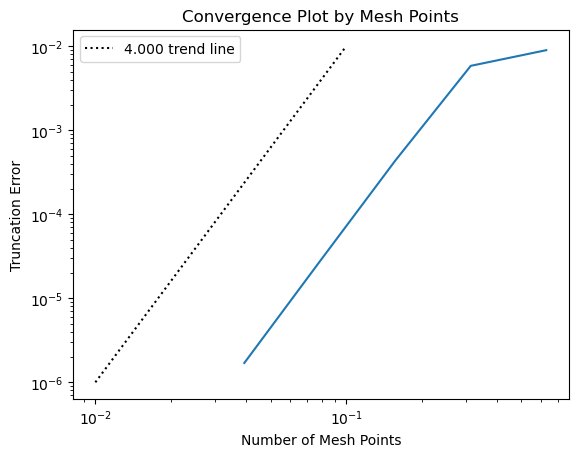

In [17]:
plt.loglog( ( 2 * np.pi ) / np.asarray( N_s ) , np.abs( net_TE_a ) )

plt.title("Convergence Plot by Mesh Points")
plt.xlabel("Number of Mesh Points")
plt.ylabel("Truncation Error")

#
# Trend Line
#
a = 4
y0 = 1e-6
x = np.logspace( -2 , -1 , num = 10 )
b = y0 / ( x[0] ** a )
y = b * ( x ** a )
plt.loglog( x , y , ":k" , label = "{x:.3f}".format(x=a) + " trend line" )
plt.legend( loc = 'best' )

#plt.xlim((1e1,3e2))
#plt.ylim((1e-5,1e-2))
plt.show()


Thus, given that our taper of truncation error is on the order of ~ -4, since this is the taper of the convergence plot, which is pretty cool since that is our calculated truncation error.


In [18]:
net_TE_b = np.zeros( len( N_s ) )
for i , N in enumerate( N_s ):
    u_calc = gradient_b.gradientCalc( np.linspace( 0 , 2 * np.pi , num = N ) , np.sin( np.linspace( 0 , 2 * np.pi , num = N ) ) )
    u_exac = np.cos( np.linspace( 0 , 2 * np.pi , num = N ) )
    TE = u_exac - u_calc
    net_TE_b[i] = np.sum( TE )

net_TE_b



array([1., 1., 1., 1., 1.])

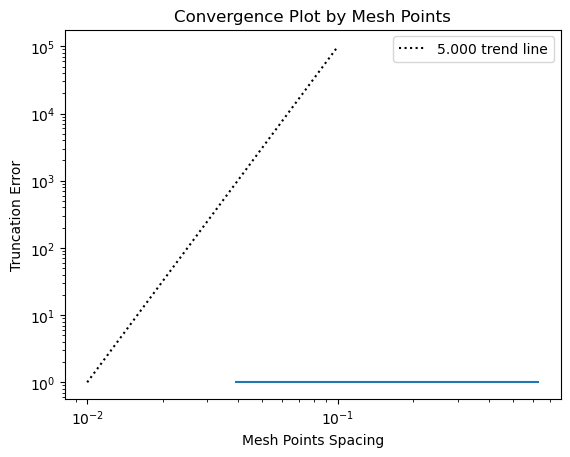

In [19]:
plt.loglog( ( 2 * np.pi ) / np.asarray( N_s ) , np.abs( net_TE_b ) )

plt.title("Convergence Plot by Mesh Points")
plt.xlabel("Mesh Points Spacing")
plt.ylabel("Truncation Error")

#
# Trend Line
#
a = 5
y0 = 1e0
x = np.logspace( -2 , -1 , num = 10 )
b = y0 / ( x[0] ** a )
y = b * ( x ** a )
plt.loglog( x , y , ":k" , label = "{x:.3f}".format(x=a) + " trend line" )
plt.legend( loc = 'best' )

#plt.xlim((1e1,3e2))
#plt.ylim((1e-1,2e0))
plt.show()



This is another odd thing that we find. My hand calculations indicated that the TE of the 2nd derivative w/ a 7-pt stencil was zero, and we see that here in the graph. I am unsure what this means, especially since we see significant error when plotting the values.


# (2)

With this data and these calculations established, we can easily move forward to more complicated functions. In this case, we will be looking at a hyperbolic tangent (tanh) function. In this case, I do not know what the derivative is off-hand, so we will simply be plotting the data.

We are interested in the same 1st derivative gradient from previously.



In [20]:
N = 100
k_s = [ 1 , 5 , 20 ]

x_s = [0] * len( k_s )
u_s = [0] * len( k_s )
du_dx_s = [0] * len( k_s )
for i , k in enumerate( k_s ):
    x = np.linspace( 0 , 5 , num = N )
    u = np.tanh( k * x - 1 )
    du_dx = k * ( np.cosh( k * x - 1 ) ** -2 )
    x_s[i] = x
    u_s[i] = u
    du_dx_s[i] = du_dx



(0.001, 5)

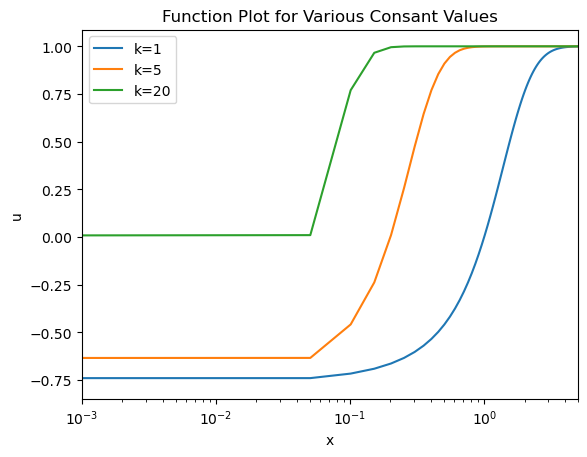

In [21]:
for i , k in enumerate( k_s ):
    plt.semilogx( x_s[i] , u_s[i] , label = 'k={x}'.format(x=k) )

plt.title("Function Plot for Various Consant Values")
plt.xlabel('x')
plt.ylabel('u')
plt.legend( loc = 'best' )
plt.xlim((1e-3,5))


This is a pretty interesting function. I've never seen this before.


In [22]:
du_dx_calcs = [0] * len( k_s )
TE_s = [0] * len( k_s )
net_TE = []
for i , k in enumerate( k_s ):
    du_dx = gradient_a.gradientCalc( x_s[i] , u_s[i] )
    TE = du_dx_s[i] - du_dx
    du_dx_calcs[i] = du_dx
    TE_s[i] = TE
    net_TE += [np.sum( TE )]


(0.01, 5)

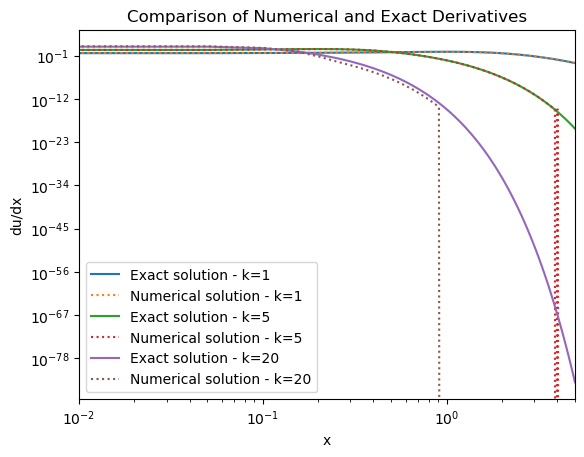

In [23]:
colors = ['r','g','b']
for i , k in enumerate( k_s ):
    plt.loglog( x_s[i] , du_dx_s[i] , label = "Exact solution - k={x}".format(x=k) )
    plt.loglog( x_s[i] , du_dx_calcs[i] , ":" , label = "Numerical solution - k={x}".format(x=k) )

plt.legend( loc = 'best' )
plt.xlabel('x')
plt.ylabel("du/dx")
plt.title("Comparison of Numerical and Exact Derivatives")\

plt.xlim((1e-2,5))


Clearly the numerical solutions for 100 points is pretty close. At the left edge, there is clearly no edge effects, which is kind of interesting. The right edge has an edge effect.


Text(0.5, 1.0, 'Truncation Error for Various Consants')

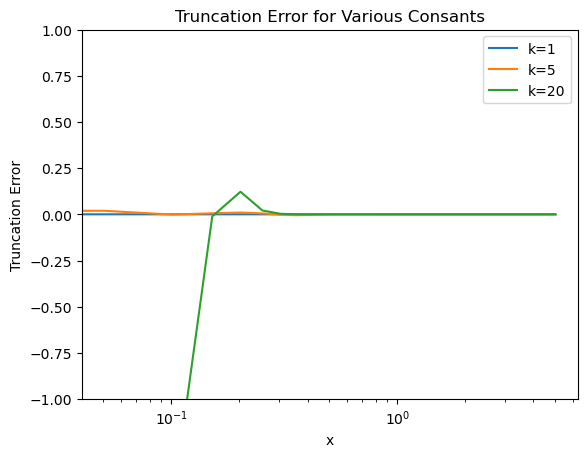

In [24]:
for i , k in enumerate( k_s ):
    plt.semilogx( x_s[i] , TE_s[i] , label = "k={x}".format(x=k) )

plt.legend( loc = "best" )
plt.ylabel("Truncation Error")
plt.xlabel("x")
plt.ylim((-1,1))
plt.title("Truncation Error for Various Consants")


In [25]:
#N_s = np.logspace( 1 , 4 , num = 1000 , dtype = np.int64 )
N_s = 10 * ( 2 ** ( np.arange( 0 , 7 ) ) )
#N_s = 10 * np.arange( 1 , 50 )
k_s = [ 1 , 5 , 20 ]

net_TE_s = np.zeros((len(N_s),len(k_s)))
rms_TE_s = np.zeros((len(N_s),len(k_s)))
for j , N in enumerate( N_s ):

    

    x_s = [0] * len( k_s )
    u_s = [0] * len( k_s )
    du_dx_s = [0] * len( k_s )
    du_dx_calcs = [0] * len( k_s )
    TE_s = [0] * len( k_s )
    net_TE = []
    rms_TE = []
    for i , k in enumerate( k_s ):
        #x = np.logspace( -12 , np.log10( 5 ) , num = N )
        x = np.linspace( 0 , 5 , num = N )
        u = np.tanh( k * x - 1 )
        du_dx = k * ( np.cosh( k * x - 1 ) ** -2 )
        x_s[i] = x
        u_s[i] = u
        du_dx_s[i] = du_dx
        du_dx = gradient_a.gradientCalc( x_s[i] , u_s[i] )
        TE = np.abs( du_dx_s[i] - du_dx )
        du_dx_calcs[i] = du_dx
        TE_s[i] = TE
        net_TE += [np.sum( TE )]
        rms_TE += [np.sqrt( np.sum( TE ** 2 ) / len( TE ) )]
        net_TE_s[j,i] = np.sum( TE )
        rms_TE_s[j,i] = np.sqrt( np.sum( TE ** 2 ) / len( TE ) )


Text(0.5, 1.0, 'Convergence Plot')

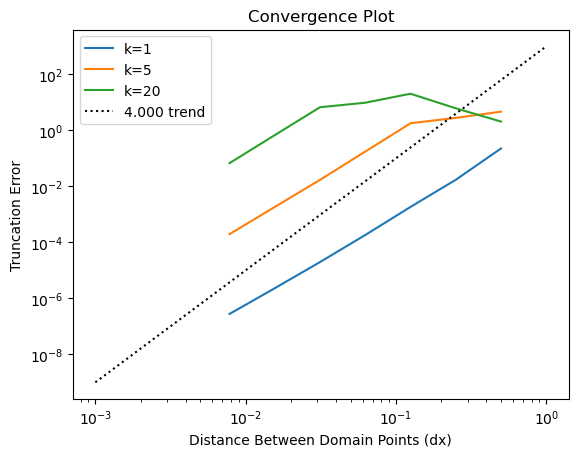

In [26]:
for i , k in enumerate( k_s ):
    plt.loglog( 5 / N_s , net_TE_s[:,i] , label = "k={x}".format(x=k) )

#
# Plot trend
#
a = 4
y0 = 1e-9
x = np.logspace( -3 , 0 , num = 10 )
b = y0 / ( x[0] ** a )
y = b * ( x ** a )
plt.loglog( x , y , ":k" , label = "{x:.3f} trend".format(x=a) )

plt.legend( loc = "best" )
plt.xlabel("Distance Between Domain Points (dx)")
plt.ylabel("Truncation Error")

plt.title( "Convergence Plot" )


Now, although the data does not follow a smooth trend perfectly, but it's pretty close.

Let's do a least squared fit of the function to all the points that are plotted.



In [27]:
import scipy.optimize as sopt

def powerFunction( x , a , b ):
    # Function that returns the power function to be called by things
    return b * ( x ** a )

xdata = np.asarray( list( N_s ) * len( k_s ) )
ydata = net_TE_s.flatten()

popt , pcov = sopt.curve_fit( powerFunction , xdata , ydata )

print("The best fit slope is {x:.3f}".format(x=popt[0]))


The best fit slope is -0.324


Okay, I'm not sure what's happening there. We can clearly see that 4 is a better fit. Maybe I will have to mess with this more later.
